<a href="https://colab.research.google.com/github/Tonry12/data_science_bootcamp_8_tonnaw/blob/main/Project1_66_Bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 2 Study Trip Advisor Hotel Reviews Sentiment

We are working with the Trip Advisor Hotel Reviews dataset. You can see the source from https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews.

* Analyze the data to find out what make a hotel good or bad
<br>You may create a tag of "positive", "negative", or "neural" sentiment first. After tagging each tweet with different sentiment, we can separate positive tweets and negative tweets. Then, it is easier to find our common patterns in positive tweets or good hotels, and vice versa.

In [ ]:
#----------------------------------------------
# Your code starts here
# label each tweet as positive, negative, and neural sentiment
# combine tweet texts in each type
# tokenize texts
# convert to lower case
# remove stop words
# remove any other stop words, like RT
# remove punctuations
# remove other symbols?
# analyze word frequency in each sentiment type and so on
# create some data visualization for the analysis and your presentation





In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive # เชื่อมบัญชีกับ google drive
drive.mount('/content/drive') # เช็คว่าเชื่อมติดหรือไม่
tripadvisor = pd.read_csv('/content/drive/MyDrive/warehouse/tripadvisor_hotel_reviews.csv')

Mounted at /content/drive


In [3]:
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [34]:
tripadvisor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  object
 2   tokens  20491 non-null  object
dtypes: object(3)
memory usage: 480.4+ KB


In [4]:
# label each tweet as positive, negative, and neural sentiment
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [5]:
tripadvisor['Rating'] = tripadvisor['Rating'].apply(rating)
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4* experience hotel monaco seat...,Neutral
3,"unique, great stay, wonderful time hotel monac...",Positive
4,"great stay great stay, went seahawk game aweso...",Positive


In [6]:
tripadvisor.dtypes

Review    object
Rating    object
dtype: object

In [7]:
tripadvisor.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
#summary
tripadvisor['Rating'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Rating, dtype: int64

In [9]:
import nltk

In [10]:
import urllib.request

In [11]:
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re
from wordcloud import WordCloud
from textblob import TextBlob
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
#function for removing the punctuations
def remove_punctuation(tripadvisor):
    punctuationfree="".join([i for i in tripadvisor if i not in string.punctuation])
    return punctuationfree

In [13]:
tripadvisor['Review']= tripadvisor['Review'].apply(lambda x:remove_punctuation(x))
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4 experience hotel monaco seatt...,Neutral
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [14]:
#Lower casing
tripadvisor['Review']= tripadvisor['Review'].apply(lambda x: x.lower())
tripadvisor.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,Positive
1,ok nothing special charge diamond member hilto...,Negative
2,nice rooms not 4 experience hotel monaco seatt...,Neutral
3,unique great stay wonderful time hotel monaco ...,Positive
4,great stay great stay went seahawk game awesom...,Positive


In [15]:
# tokenize texts
tripadvisor['Review']=tripadvisor['Review'].astype(str)
def tokenize_review(review):
    tokens = word_tokenize(review)
    return tokens
tripadvisor['tokens'] = tripadvisor['Review'].apply(tokenize_review)
tripadvisor.head()

,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, not, 4, experience, hotel, monac..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [16]:
#Removing Stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tripadvisor):
    output= [i for i in tripadvisor if i not in stopwords]
    return output
tripadvisor['tokens']= tripadvisor['tokens'].apply(lambda x:remove_stopwords(x))
tripadvisor.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."


In [17]:
#combine tweet texts in each type
pos = tripadvisor.loc[tripadvisor["Rating"] == "Positive", :]
neg = tripadvisor.loc[tripadvisor["Rating"] == "Negative", :]
neu = tripadvisor.loc[tripadvisor["Rating"] == "Neutral", :]

In [18]:
pos.head(5)


,Review,Rating,tokens
0,nice hotel expensive parking got good deal sta...,Positive,"[nice, hotel, expensive, parking, got, good, d..."
3,unique great stay wonderful time hotel monaco ...,Positive,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,Positive,"[great, stay, great, stay, went, seahawk, game..."
5,love monaco staff husband stayed hotel crazy w...,Positive,"[love, monaco, staff, husband, stayed, hotel, ..."
6,cozy stay rainy city husband spent 7 nights mo...,Positive,"[cozy, stay, rainy, city, husband, spent, 7, n..."


In [19]:
neg.head(5)


,Review,Rating,tokens
1,ok nothing special charge diamond member hilto...,Negative,"[ok, nothing, special, charge, diamond, member..."
10,poor value stayed monaco seattle july nice hot...,Negative,"[poor, value, stayed, monaco, seattle, july, n..."
15,horrible customer service hotel stay february ...,Negative,"[horrible, customer, service, hotel, stay, feb..."
16,disappointed say anticipating stay hotel monac...,Negative,"[disappointed, say, anticipating, stay, hotel,..."
24,great location need internally upgrade advanta...,Negative,"[great, location, need, internally, upgrade, a..."


In [20]:
neu.head(5)

,Review,Rating,tokens
2,nice rooms not 4 experience hotel monaco seatt...,Neutral,"[nice, rooms, 4, experience, hotel, monaco, se..."
13,nice hotel not nice staff hotel lovely staff q...,Neutral,"[nice, hotel, nice, staff, hotel, lovely, staf..."
19,hmmmmm say really high hopes hotel monaco chos...,Neutral,"[hmmmmm, say, really, high, hopes, hotel, mona..."
25,nt mind noise place great read reviews noise u...,Neutral,"[nt, mind, noise, place, great, read, reviews,..."
27,met expectations centrally located hotel block...,Neutral,"[met, expectations, centrally, located, hotel,..."


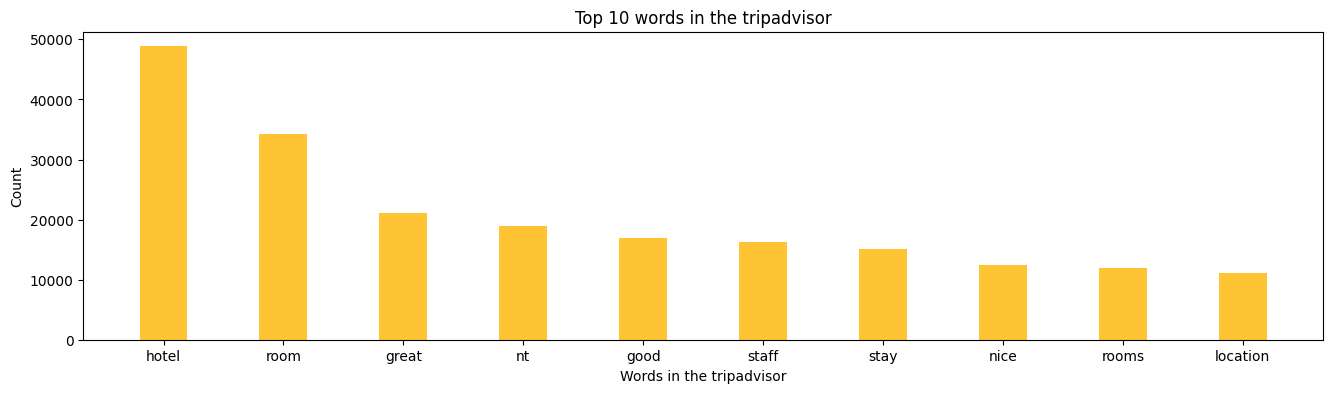

In [31]:
#Statistical Analysis
freq = {}
for i in tripadvisor['tokens']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1
list(freq.items())[:25]
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))
f1=freq_df[0][:10]
f2=freq_df[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='#FFC433',width = 0.4)
plt.xlabel("Words in the tripadvisor")
plt.ylabel("Count")
plt.title("Top 10 words in the tripadvisor")
plt.savefig("wordfrequency.png")
plt.show()

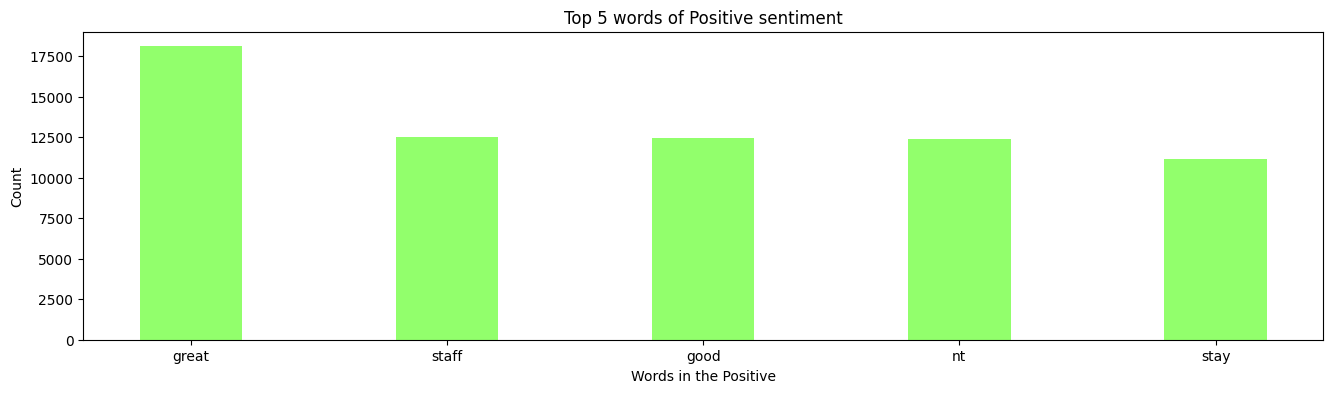

In [48]:
#histogram Positive sentiment
freq = {}
for i in pos['tokens']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1
list(freq.items())[:25]
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))
f1=freq_df[0][2:7]
f2=freq_df[1][2:7]
plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='#92FF6C',width = 0.4)
plt.xlabel("Words in the Positive")
plt.ylabel("Count")
plt.title("Top 5 words of Positive sentiment")
plt.savefig("wordfrequency.png")
plt.show()

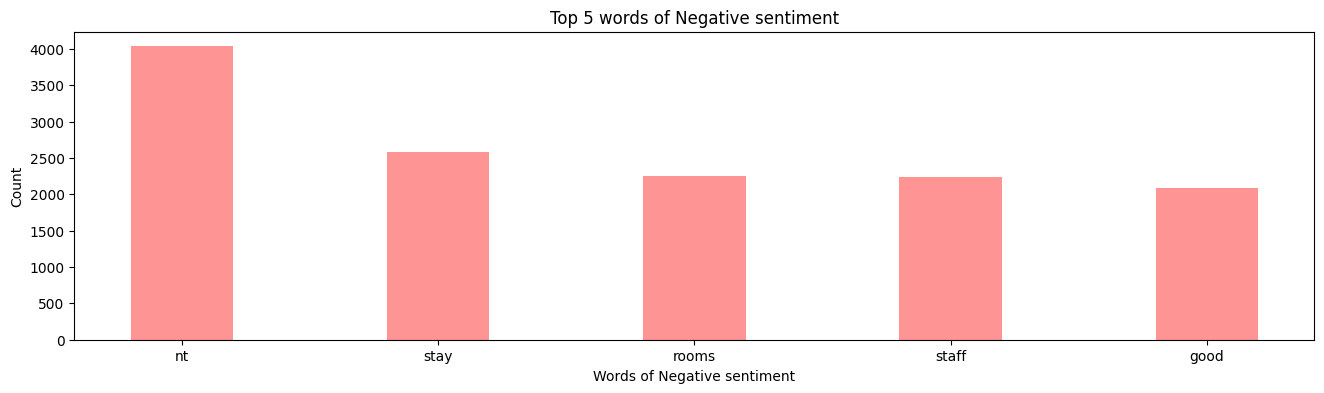

In [46]:
#histogram Negative  sentiment
freq = {}
for i in neg['tokens']:
    for j in i:
        if j not in freq:
            freq[j] = 1
        else:
            freq[j] += 1
list(freq.items())[:25]
freq_df=pd.DataFrame(sorted(freq.items(),key=lambda x:x[1],reverse=True))
f1=freq_df[0][2:7]
f2=freq_df[1][2:7]
plt.figure(1,figsize=(16,4))
plt.bar(f1,f2,color ='#FF9494',width = 0.4)
plt.xlabel("Words of Negative sentiment")
plt.ylabel("Count")
plt.title("Top 5 words of Negative sentiment")
plt.savefig("wordfrequency.png")
plt.show()

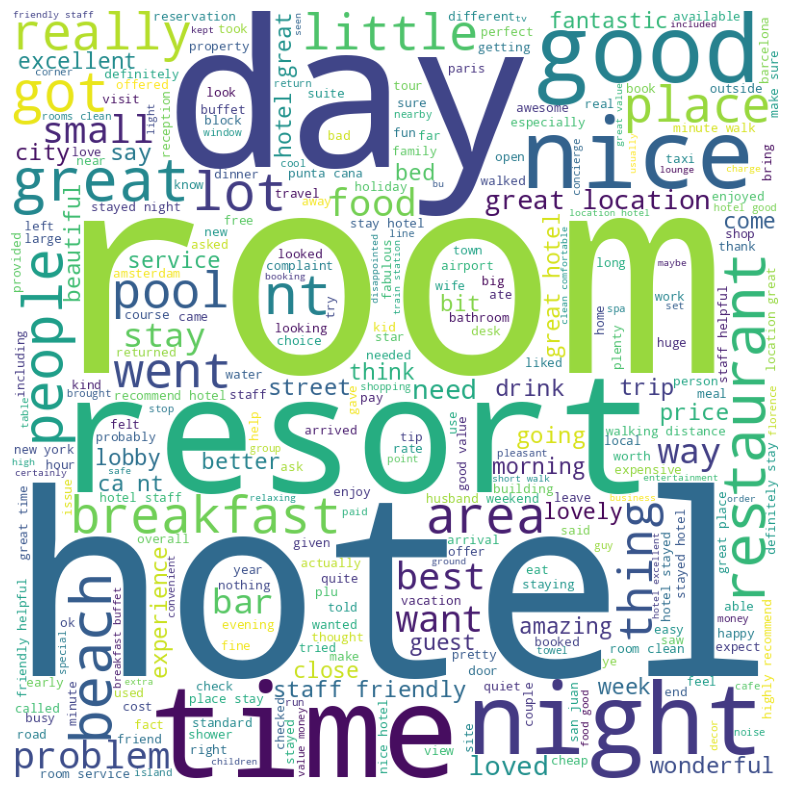

In [33]:
#Word Cloud of Positive
from wordcloud import WordCloud
wc = WordCloud(max_words=500,
               min_font_size=10,
               height=800,
               width=800,
               background_color="white")
wc.generate(''.join(pos['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

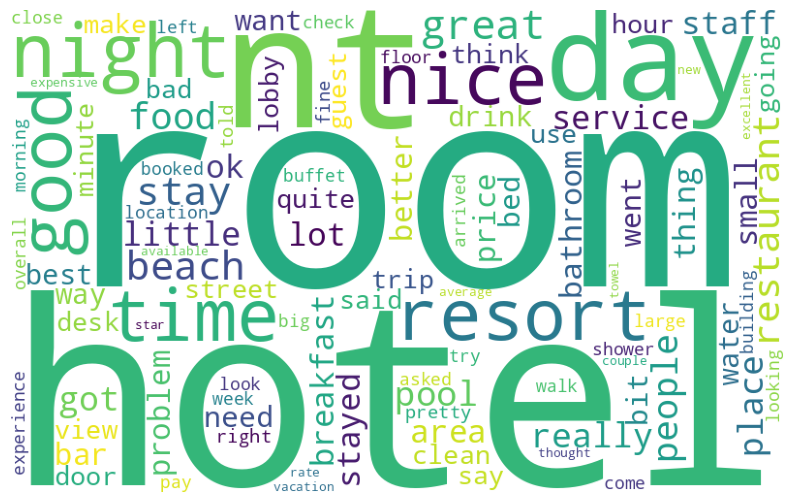

In [23]:
#Word Cloud of Neutral
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)
wc.generate(''.join(neu['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

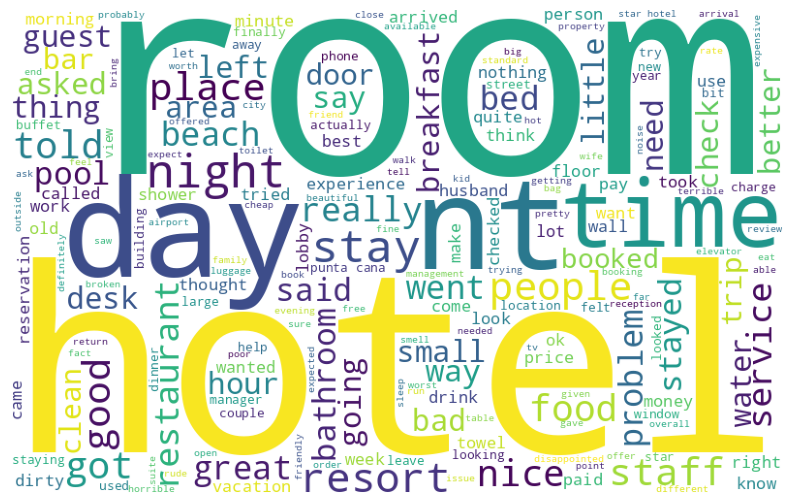

In [24]:
#Word Cloud of Negative
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=500,
               background_color='white',
               min_font_size=10)
wc.generate(''.join(neg['Review']))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Report
* How did you analyze the data?
* What did you find in the data? (please include figures or tables in the report, but no source code)